Integration of m_LCA1-2, h_LCA1-5, T

In [28]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, color_map = 'viridis_r')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


# Read  and combine filtered datasets

In [3]:
results_file = 'write_LCA/integrated_LCA_T_combat.h5ad'  # combat integrated , unified human symbols, mt/rib/cell-cycle genes removed

In [4]:
adatas = sc.read_h5ad(results_file)

Read each filtered data.Use the logtransformed normalized counts.

In [5]:
adata_m_T=sc.read_h5ad("write_LCA/m_LCA1-2_T_v2.h5ad")
adata_h_T=sc.read_h5ad("write_LCA/h_LCA1-5_T_v2.h5ad")

In [6]:
adata_m=adata_m_T.raw.to_adata()
adata_h=adata_h_T.raw.to_adata()

Add species to obs.key

In [7]:
adata_m.obs['species']='mouse'
adata_h.obs['species']='human'

### Convert mouse gene names to human gene names:

In [8]:
hom_dict = np.load('write_LCA/hom_dict_v2.npy',allow_pickle=True).item() # load the 1:1 homolog dictionary

#### convert mouse genes

In [9]:
mouse_symbols = list(adata_m.var_names)

In [10]:
mouse_convert_symbols = [] # human homologs
n_miss = 0 # number of genes not found in the dictionary
for mouse_symbol in mouse_symbols:
    try:
        mouse_convert_symbols.append(hom_dict[mouse_symbol])
    except KeyError:
        mouse_convert_symbols.append('miss-'+str(n_miss))
        n_miss +=1
        print(mouse_symbol+' not found') # print genes not found in the homolog conversion dictionary

0610007P14Rik not found
0610009B22Rik not found
0610009L18Rik not found
0610009O20Rik not found
0610010F05Rik not found
0610011F06Rik not found
0610037L13Rik not found
1110001J03Rik not found
1110004E09Rik not found
1110007C09Rik not found
1110008F13Rik not found
1110008L16Rik not found
1110008P14Rik not found
1110012L19Rik not found
1110025L11Rik not found
1110034G24Rik not found
1110037F02Rik not found
1110057P08Rik not found
1190002N15Rik not found
1190003K10Rik not found
1190005I06Rik not found
1200014J11Rik not found
1300017J02Rik not found
1500009C09Rik not found
1500011B03Rik not found
1500011K16Rik not found
1500012F01Rik not found
1500015O10Rik not found
1520401A03Rik not found
1600002H07Rik not found
1600002K03Rik not found
1600014C23Rik not found
1600014K23Rik not found
1600015I10Rik not found
1600029O15Rik not found
1700001C02Rik not found
1700001C19Rik not found
1700001F09Rik not found
1700001J03Rik not found
1700001J11Rik not found
1700001K19Rik not found
1700003H04Rik no

In [11]:
print('mouse genes without 1:1 homologous human genes in adata_m: '+str(n_miss))
print('mouse genes in adata_m: '+str(len(mouse_symbols)))
print('mouse genes converted successfully to human homologs in adata_m: '+str(len(mouse_symbols)-n_miss))

mouse genes without 1:1 homologous human genes in adata_m: 12292
mouse genes in adata_m: 27656
mouse genes converted successfully to human homologs in adata_m: 15364


In [12]:
adata_m.var_names = mouse_convert_symbols

In [13]:
adata_m.var_names

Index(['miss-0', 'miss-1', 'miss-2', 'miss-3', 'miss-4', 'C17orf49', 'miss-5',
       'C2orf68', 'miss-6', 'C4orf19',
       ...
       'ZWINT', 'miss-12290', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'ASIP', 'miss-12291'],
      dtype='object', length=27656)

### Combine different datasets

In [14]:
adatas=[adata_m,adata_h]

In [15]:
adatas = ad.concat(adatas, merge = "same")

In [16]:
adatas

AnnData object with n_obs × n_vars = 12417 × 15145
    obs: 'Barcode', 'Library', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'leiden', 'lymphoid', 'label_rough', 'label_subtype', 'label_subtype_hres', 'species'
    var: 'mt'
    obsm: 'X_pca', 'X_umap'

In [29]:
adatas.write(results_file)

# integration by combat

In [23]:
adatas

AnnData object with n_obs × n_vars = 12417 × 15145
    obs: 'Barcode', 'Library', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'leiden', 'lymphoid', 'label_rough', 'label_subtype', 'species'
    var: 'mt'
    obsm: 'X_pca', 'X_umap'

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


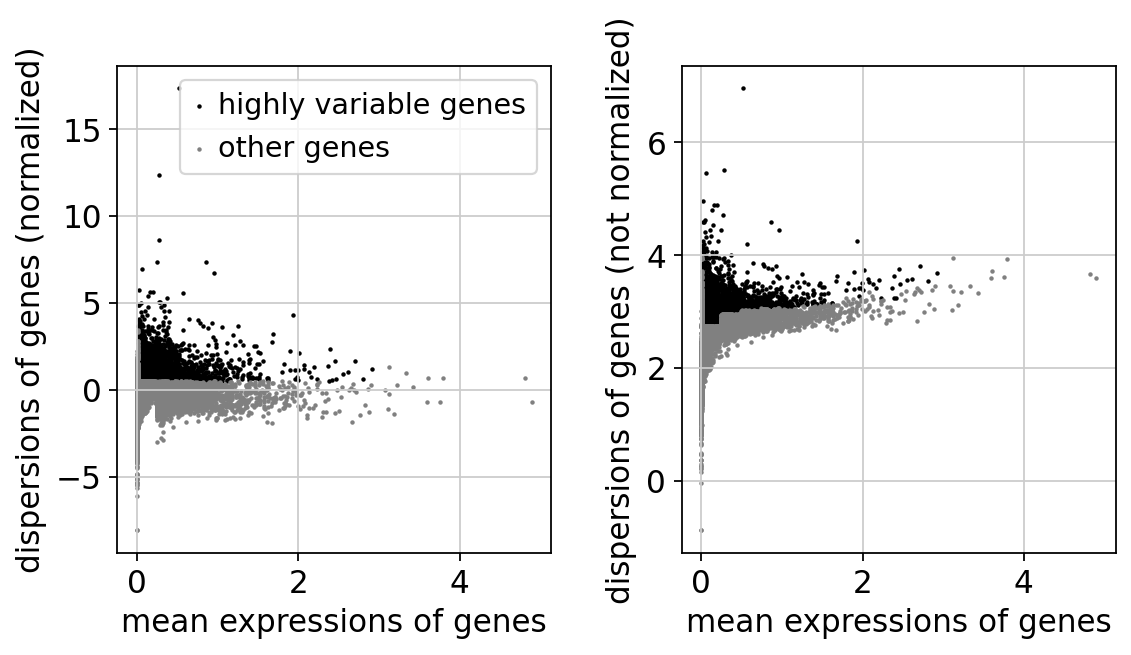

In [17]:
sc.pp.highly_variable_genes(adatas) 
sc.pl.highly_variable_genes(adatas)
adatas.raw = adatas
adatas = adatas[:, adatas.var.highly_variable]

In [18]:
sc.pp.regress_out(adatas, ['total_counts','pct_counts_mt'])
sc.pp.scale(adatas, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'Barcode' as categorical
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categ

    finished (0:00:52)


In [19]:
sc.pp.combat(adatas, key='species', covariates=None, inplace=True)

Standardizing Data across genes.

Found 2 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:12)


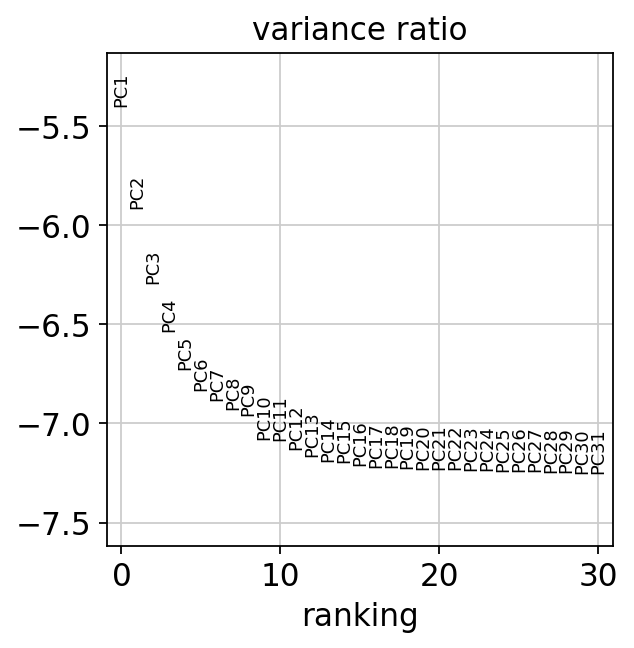

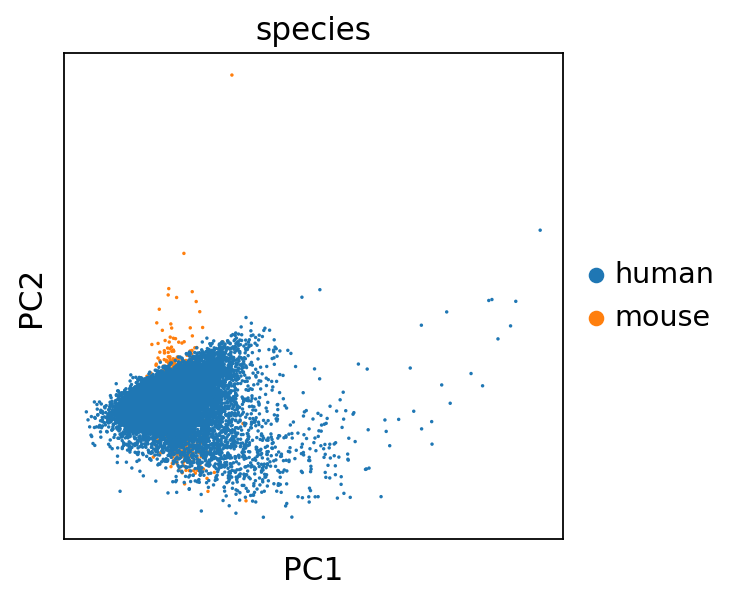

In [20]:
sc.tl.pca(adatas, svd_solver='arpack')
sc.pl.pca_variance_ratio(adatas, log=True)
sc.pl.pca(adatas, color = 'species')

In [21]:
sc.pp.neighbors(adatas,n_pcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


In [22]:
sc.tl.umap(adatas)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


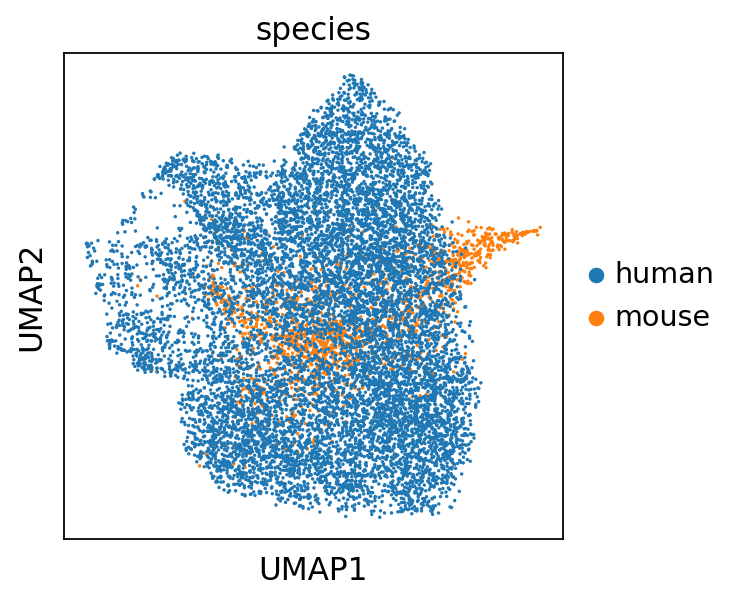

In [23]:
sc.pl.umap(adatas, color='species')

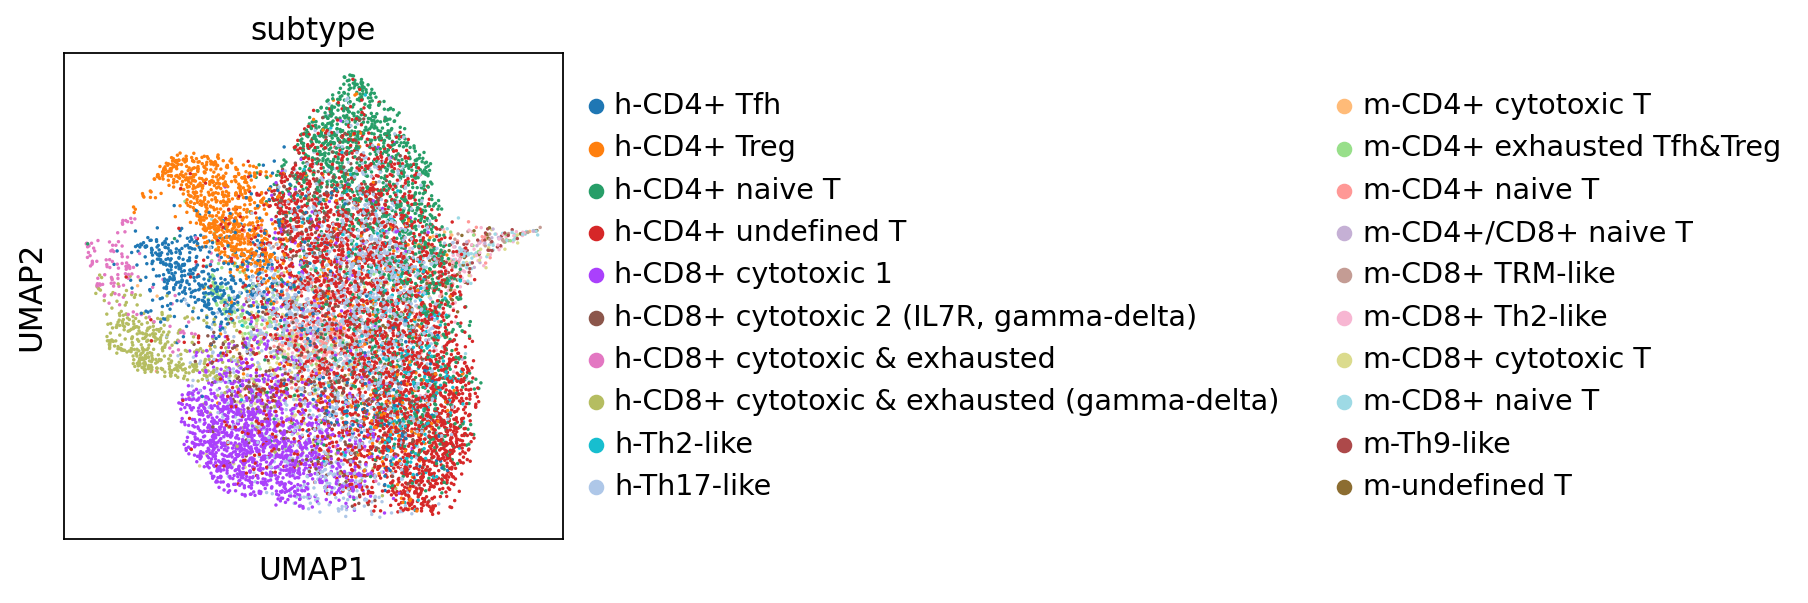

In [25]:
sc.pl.umap(adatas, color='label_subtype_hres',title='subtype')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


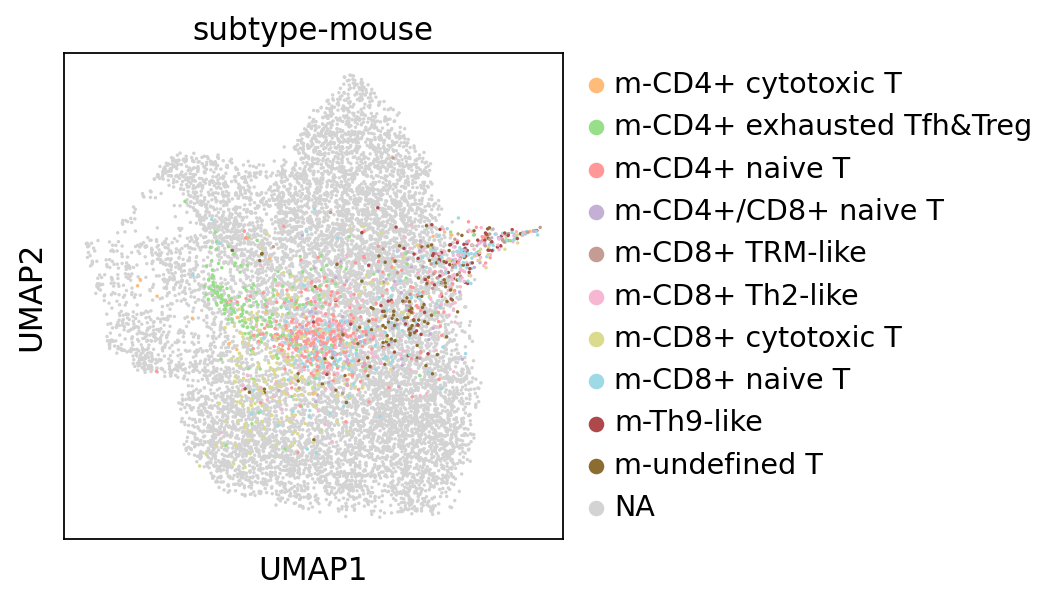

In [26]:
sc.pl.umap(adatas, color=['label_subtype_hres'],groups=list(adatas[adatas.obs['species']=='mouse',:].obs['label_subtype_hres'].unique()), title='subtype-mouse')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


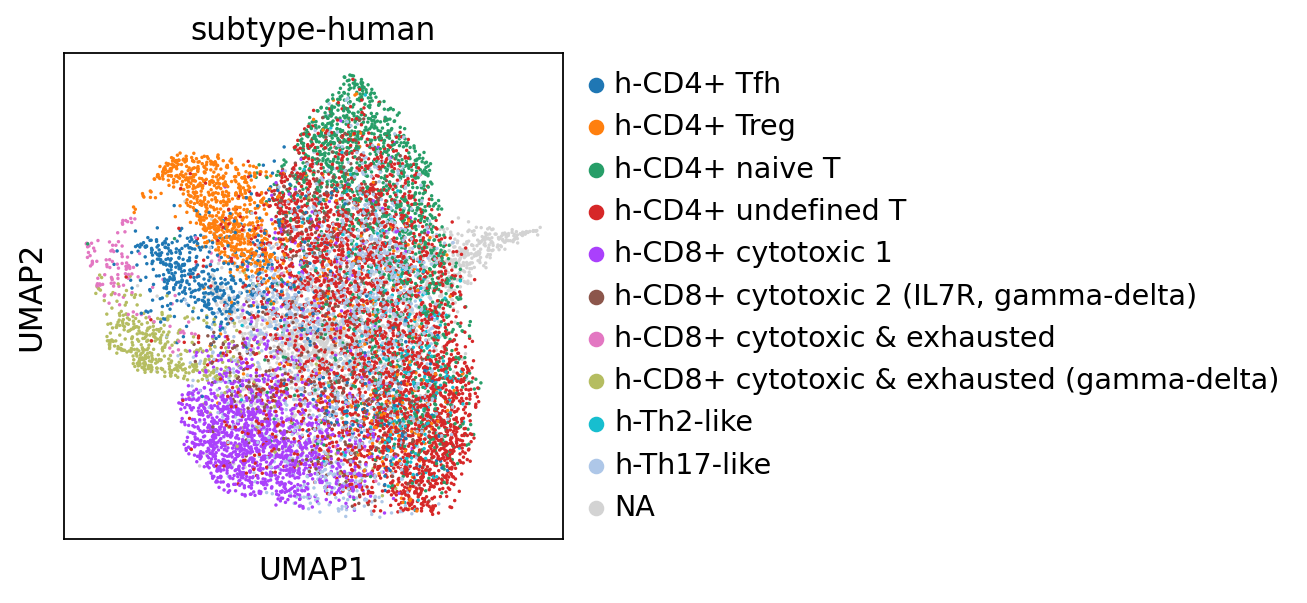

In [27]:
sc.pl.umap(adatas, color=['label_subtype_hres'],groups=list(adatas[adatas.obs['species']=='human',:].obs['label_subtype_hres'].unique()), title='subtype-human')

In [15]:
adatas

AnnData object with n_obs × n_vars = 12550 × 3645
    obs: 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_singleR', 'Major cell type', 'Minor subset', 'Library', 'leiden', 'lymphoid', 'label_rough', 'label_subtype', 'species', 'label_subtype_human', 'label_subtype_mouse'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'label_subtype_colors', 'label_subtype_human_colors', 'hvg', 'pca', 'species_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

check expression of house-keeping genes

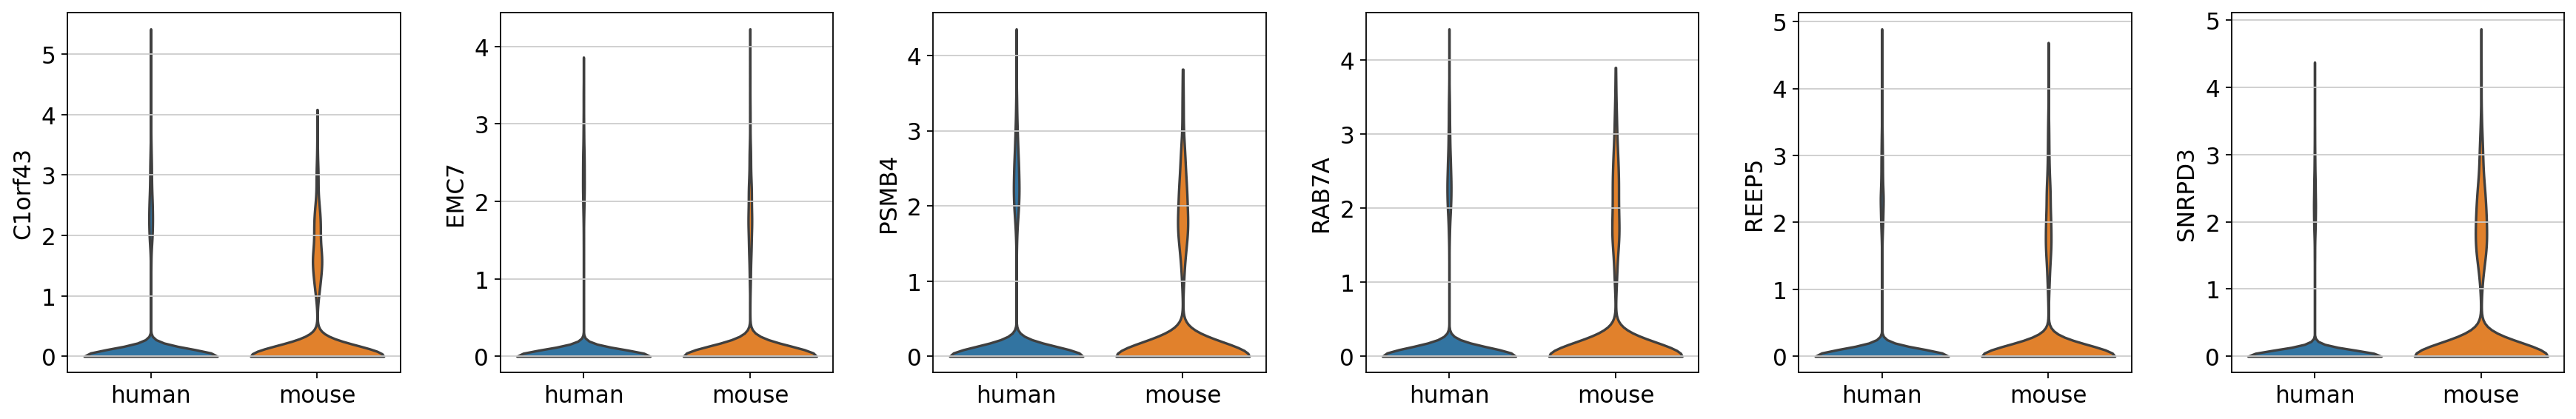

In [52]:
# human SEG & highly-uniform & strongly expressed genes(https://www.tau.ac.il/~elieis/HKG/)
keys = keys=['C1orf43','EMC7','PSMB4','RAB7A','REEP5','SNRPD3'] 
sc.pl.violin(adatas, keys=keys, groupby='species',rotation=0, stripplot=False, multi_panel=2)

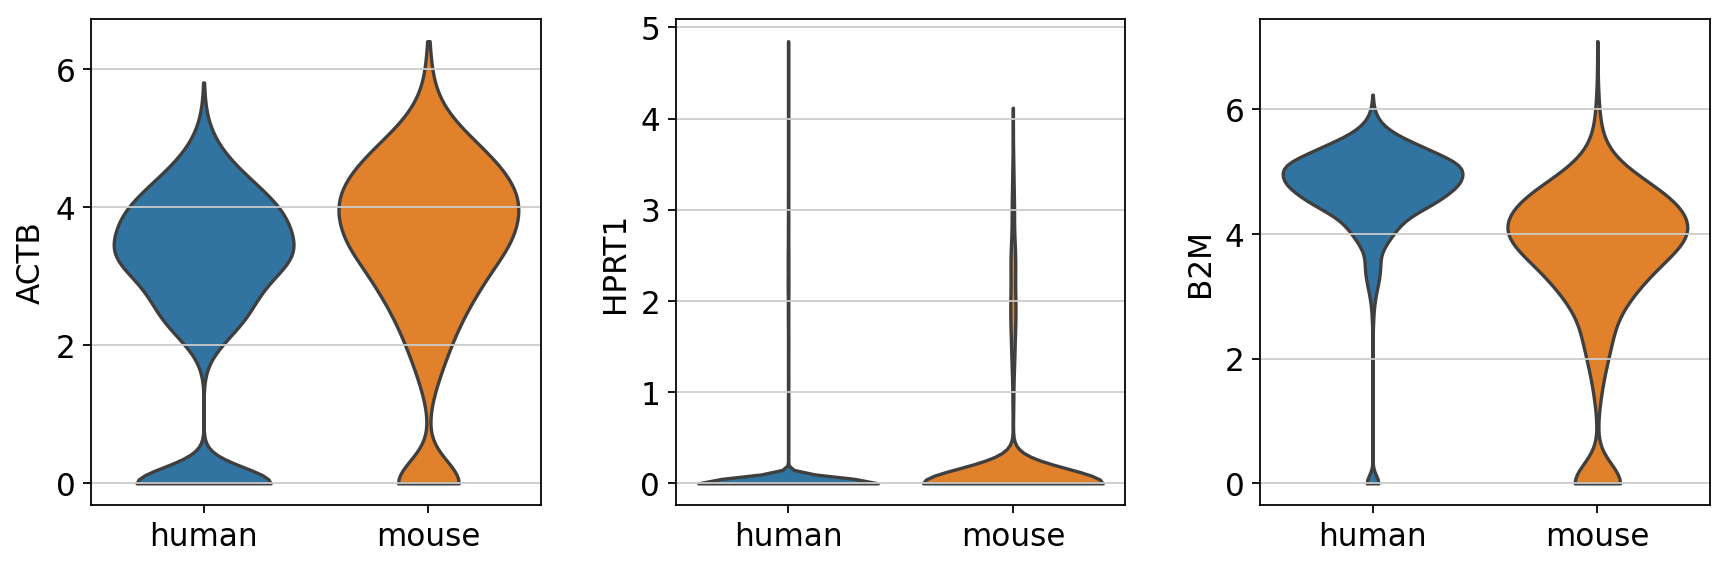

In [56]:
# traditional HKGs
keys = keys=['ACTB','HPRT1','B2M'] 
sc.pl.violin(adatas, keys=keys, groupby='species',rotation=0, stripplot=False, multi_panel=2)

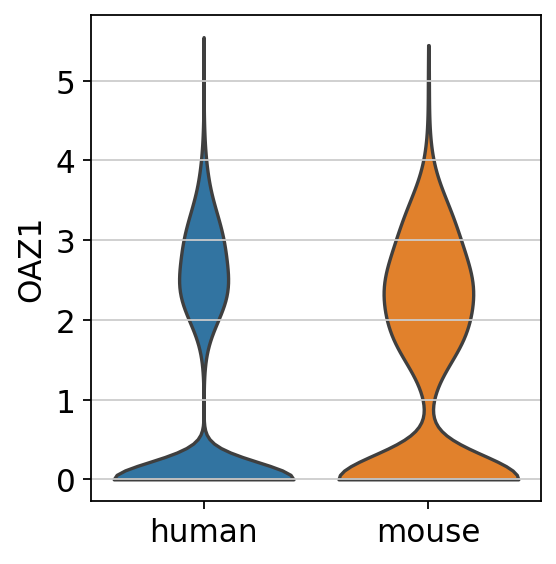

In [58]:
#newly-defiend HKGs
keys = keys=['OAZ1']
sc.pl.violin(adatas, keys=keys, groupby='species',rotation=0, stripplot=False, multi_panel=2)

In [ ]:
# exhausted markers
keys = keys=[
sc.pl.violin(adatas, keys=keys, groupby='species',rotation=0, stripplot=False, multi_panel=2, use_raw=False)

In [50]:
# traditional HKGs
keys = ['OAZ1']
sc.pl.violin(adatas, keys=keys, groupby='species',rotation=45, stripplot=False, multi_panel=2, use_raw=False)

KeyError: "Could not find keys '['OAZ1']' in columns of `adata.obs` or in adata.var_names."

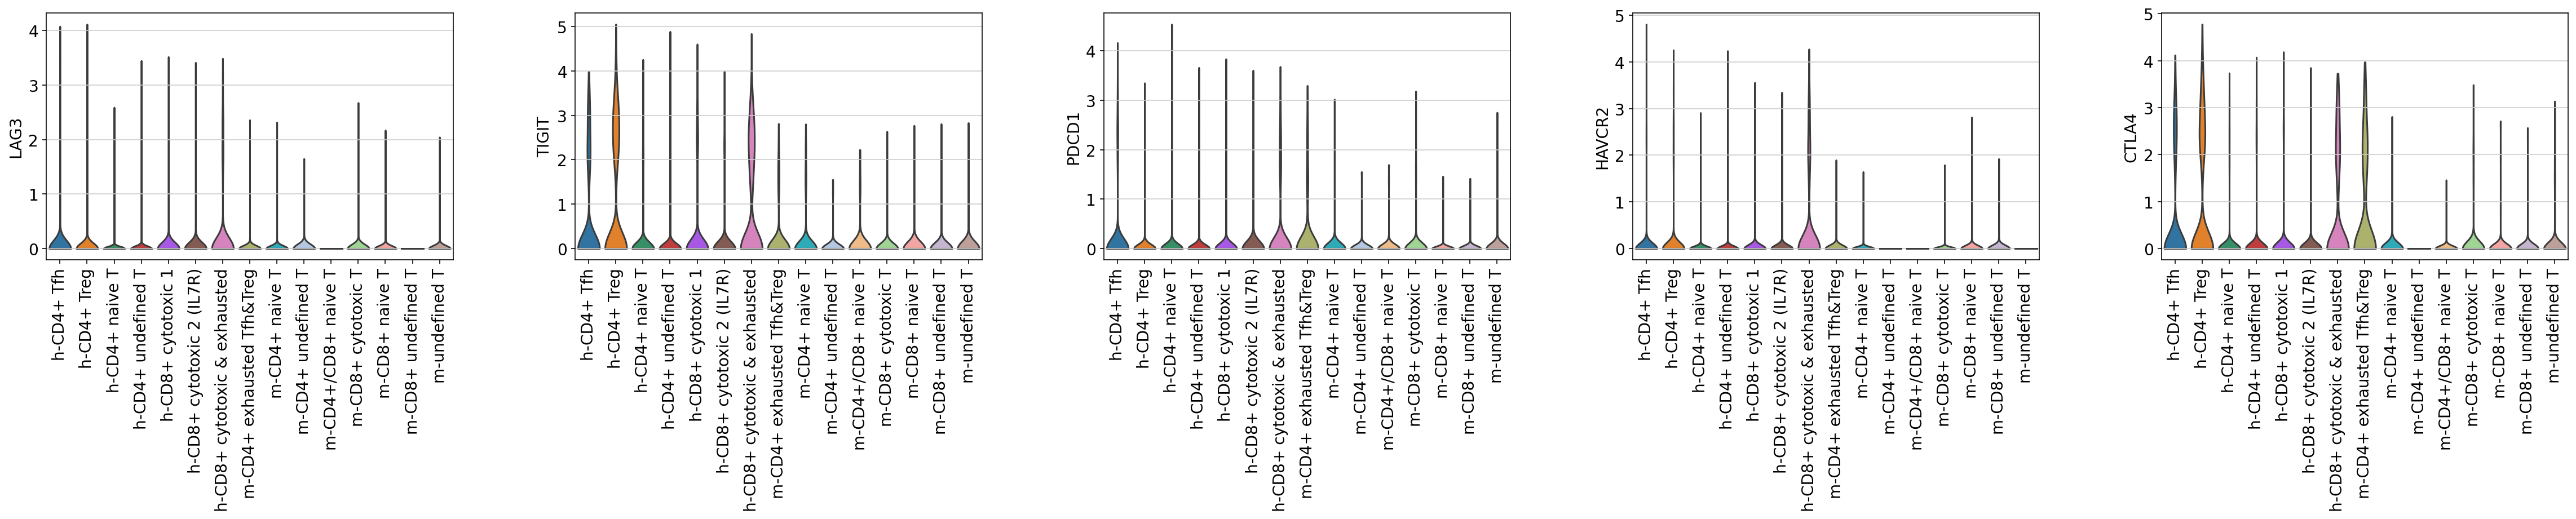

In [33]:
markers_exhausted = ['LAG3','TIGIT','PDCD1','HAVCR2','CTLA4']
sc.pl.violin(adatas, keys=markers_exhausted, groupby='label_subtype',rotation=90, stripplot=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


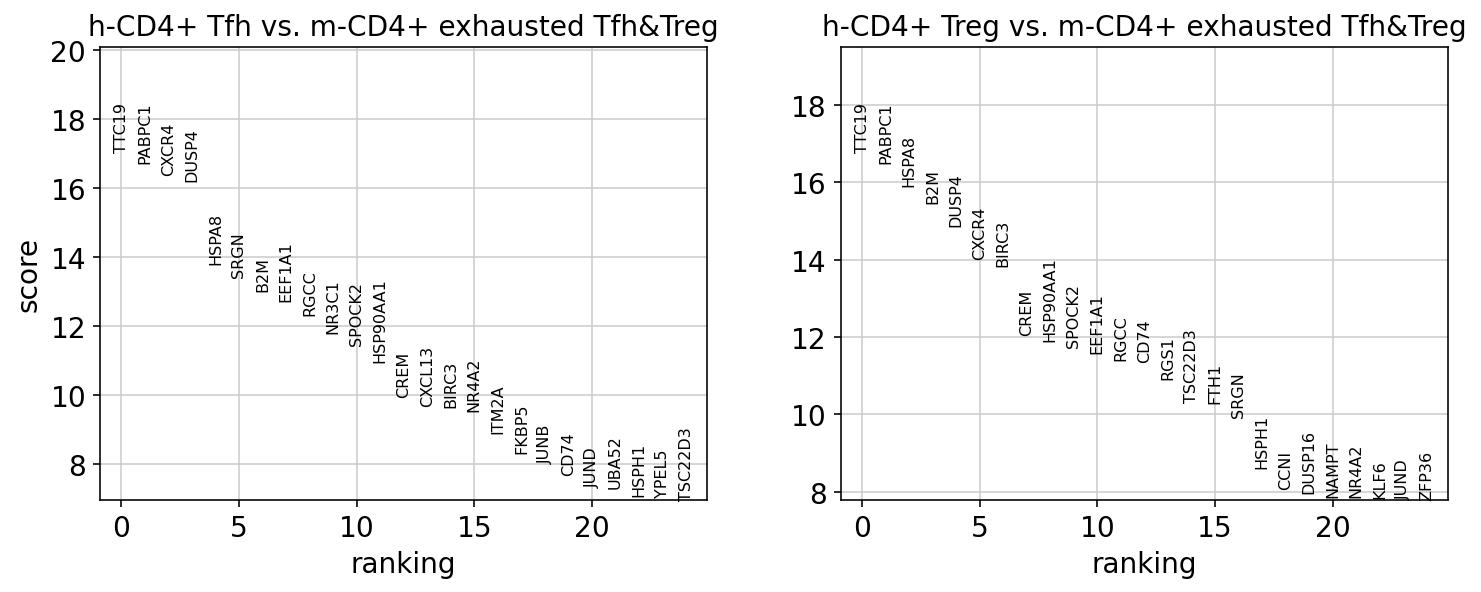

In [35]:
sc.tl.rank_genes_groups(adatas, 'label_subtype', method='wilcoxon',groups = ['h-CD4+ Tfh','h-CD4+ Treg'],reference='m-CD4+ exhausted Tfh&Treg')
sc.pl.rank_genes_groups(adatas, n_genes=25, sharey=False)

In [4]:
adatas = sc.read_h5ad(results_file)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [40]:
#import scanpy.api as sc
import matplotlib.pyplot as plt
import seaborn as sns
def get_cluster_proportions(adata,
                            cluster_key="cluster_final",
                            sample_key="replicate",
                            drop_values=None):
    """
    Input
    =====
    adata : AnnData object
    cluster_key : key of `adata.obs` storing cluster info
    sample_key : key of `adata.obs` storing sample/replicate info
    drop_values : list/iterable of possible values of `sample_key` that you don't want
    
    Returns
    =======
    pd.DataFrame with samples as the index and clusters as the columns and 0-100 floats
    as values
    """
    
    adata_tmp = adata.copy()
    sizes = adata_tmp.obs.groupby([cluster_key, sample_key]).size()
    props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
    props = props.pivot(columns=sample_key, index=cluster_key).T
    props.index = props.index.droplevel(0)
    props.fillna(0, inplace=True)
    
    if drop_values is not None:
        for drop_value in drop_values:
            props.drop(drop_value, axis=0, inplace=True)
    return props

def plot_cluster_proportions(cluster_props, 
                             cluster_palette=None,
                             xlabel_rotation=0): 
    fig, ax = plt.subplots(dpi=300,figsize=(4,3))
    fig.patch.set_facecolor("white")
    
    cmap = None
    if cluster_palette is not None:
        cmap = sns.palettes.blend_palette(
            cluster_palette, 
            n_colors=len(cluster_palette), 
            as_cmap=True)
   
    cluster_props.plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        legend=None, 
        colormap=cmap
    )
    
    ax.legend(bbox_to_anchor=(1.01, 1), frameon=False, title="Cluster",fontsize=8, title_fontsize=8)
    sns.despine(fig, ax)
    ax.tick_params(axis="x", rotation=xlabel_rotation)
    ax.set_xlabel(cluster_props.index.name.capitalize(),fontsize=12)
    ax.set_ylabel("Proportion",fontsize=12)
    fig.tight_layout()
    
    return fig

In [42]:
# create a dictionary to map cluster to lymphoid annotation label
cluster2annotation = {
     'm-CD4+ exhausted Tfh&Treg':'regulatory',
     'm-CD4+ cytotoxic T':'exhausted&cytotoxic',
    'm-CD8+ cytotoxic T':'cytotoxic',
    'm-CD4+ naive T':'resting',
    'm-CD8+ naive T':'resting',
    'm-CD4+/CD8+ naive T':'resting',
    'm-CD8+ TRM-like':'resting',
    'm-CD8+ Th2-like':'helper',
    'm-Th9-like':'helper',
    'm-undefined T':'resting',
    'h-CD4+ Tfh':'helper',
    'h-CD4+ Treg':'regulatory',
    'h-CD4+ naive T':'resting',
    'h-CD4+ undefined T':'resting',
    'h-CD8+ cytotoxic 1':'cytotoxic',
    'h-CD8+ cytotoxic 2 (IL7R, gamma-delta)':'cytotoxic',
    'h-CD8+ cytotoxic & exhausted':'exhausted&cytotoxic',
    'h-CD8+ cytotoxic & exhausted (gamma-delta)':'exhausted&cytotoxic',
    'h-Th2-like':'helper',
    'h-Th17-like':'helper'
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adatas.obs['function'] = adatas.obs['label_subtype_hres'].map(cluster2annotation).astype('category')

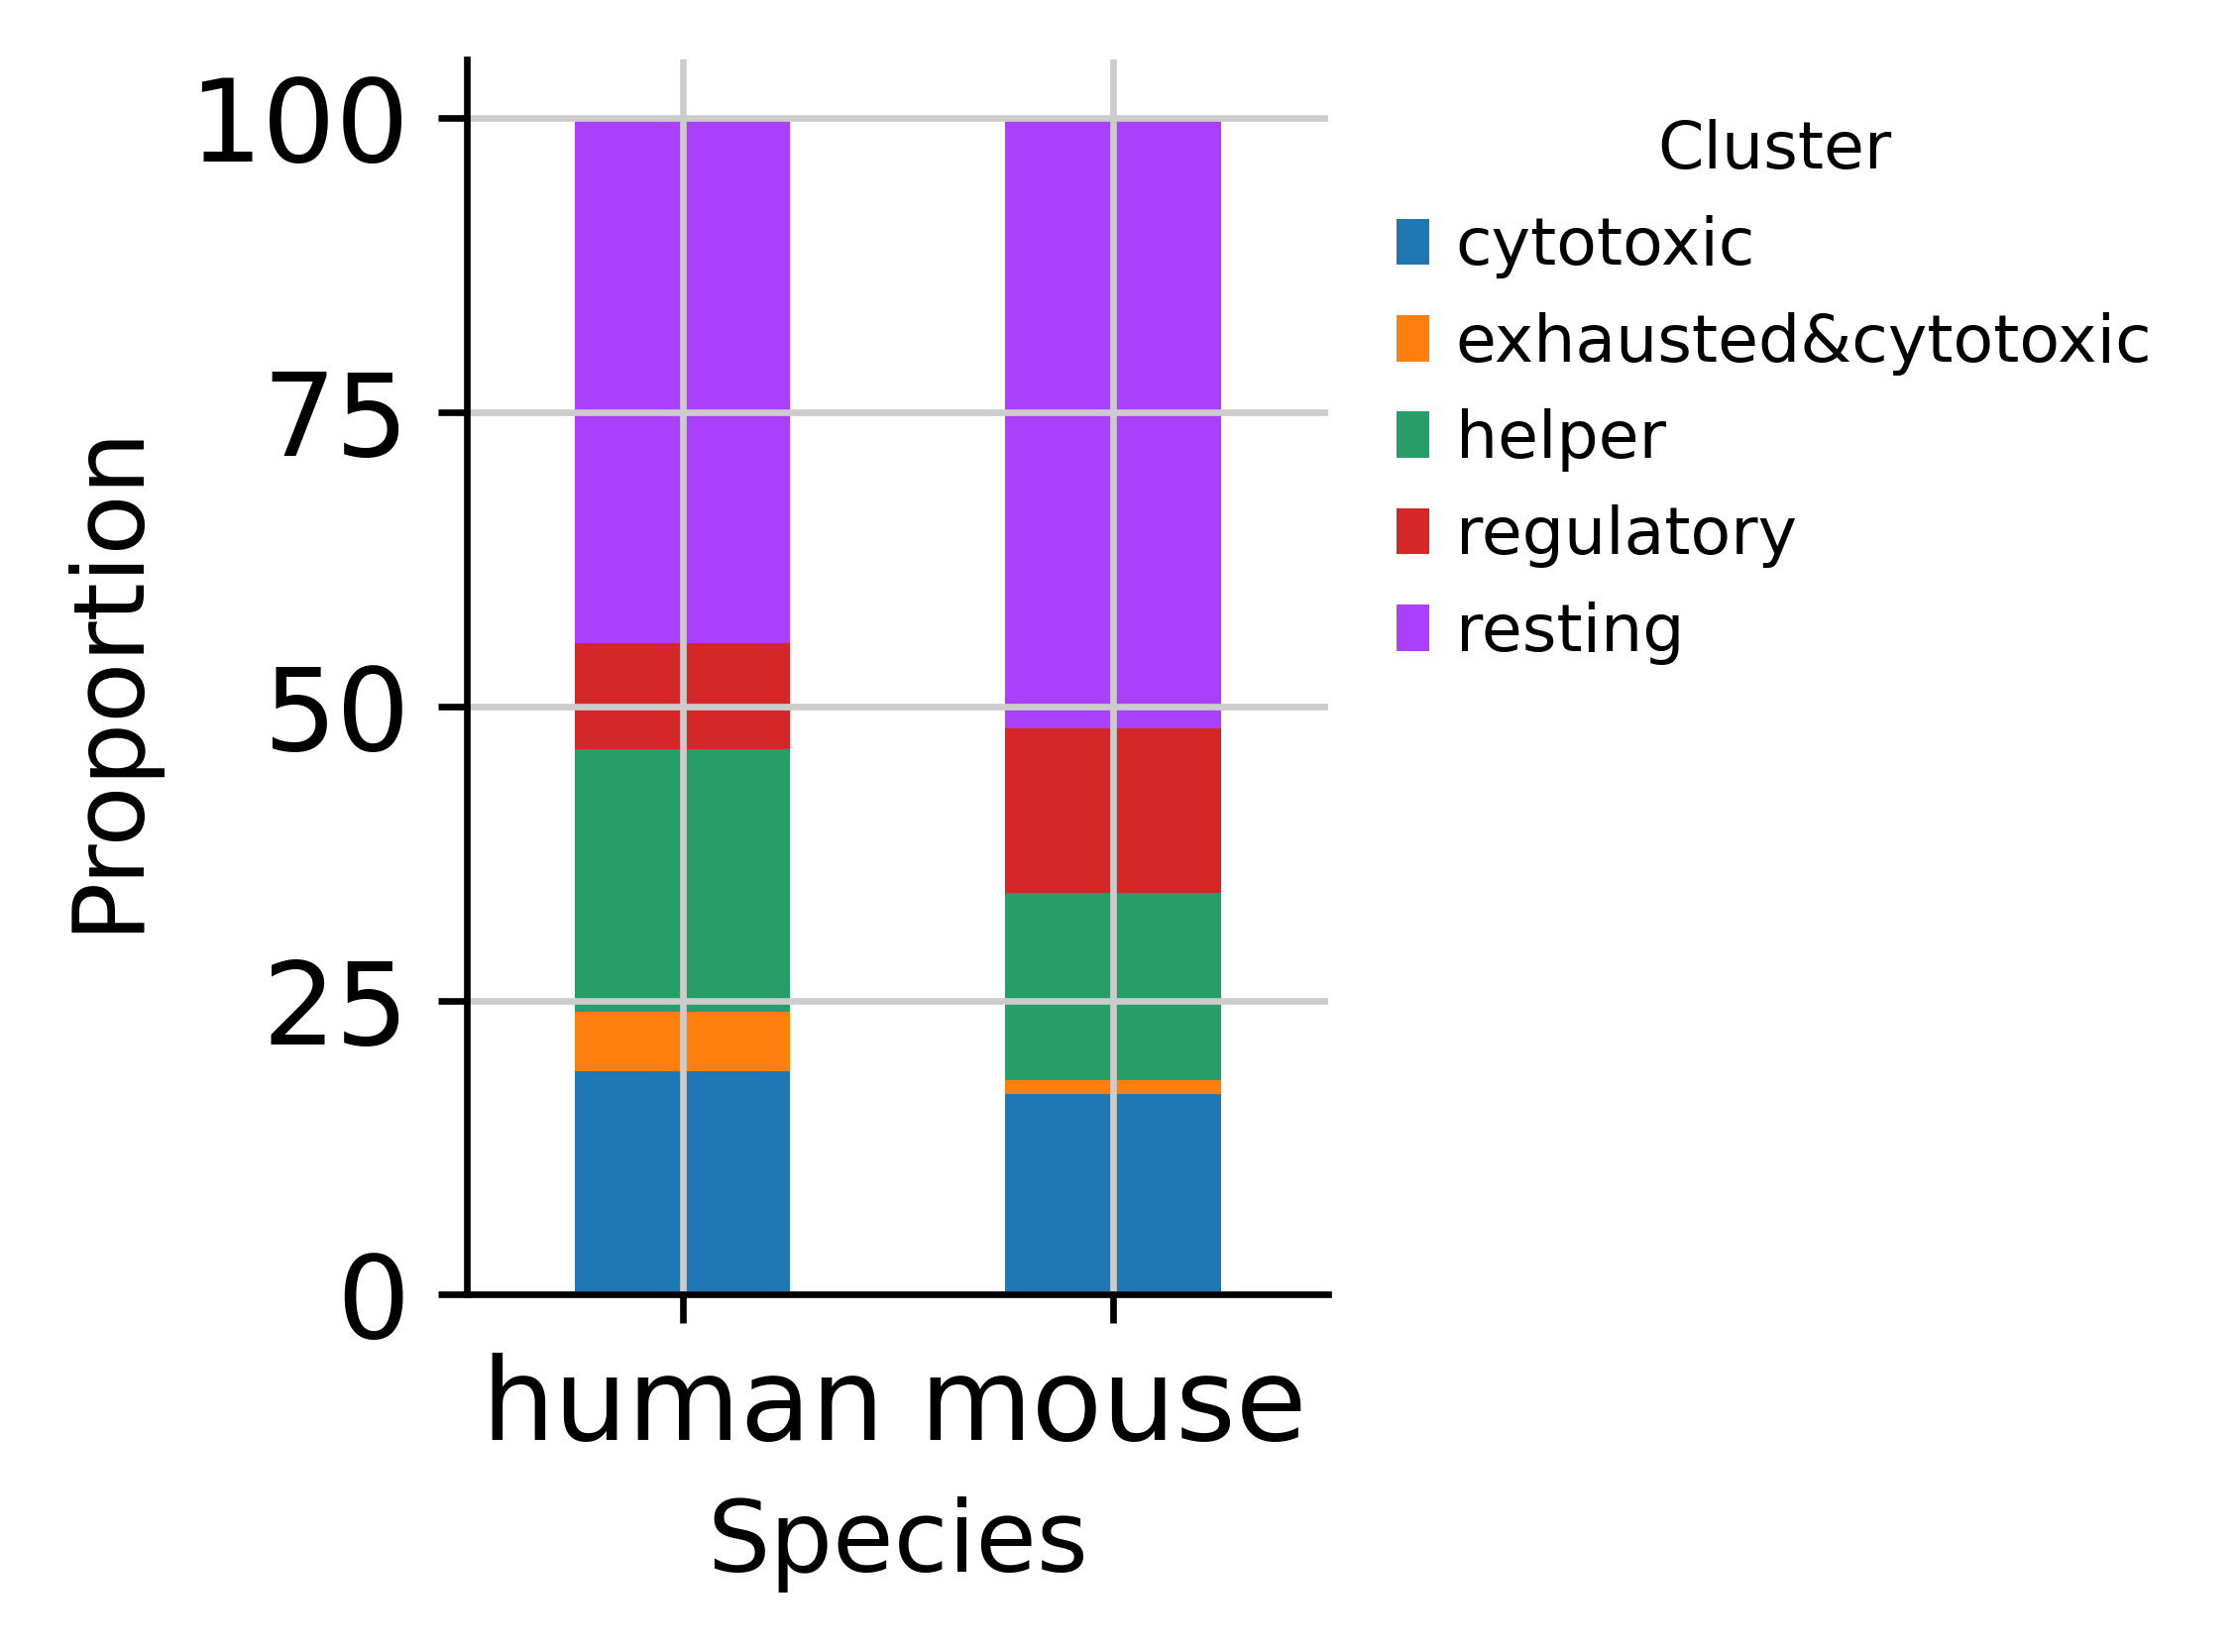

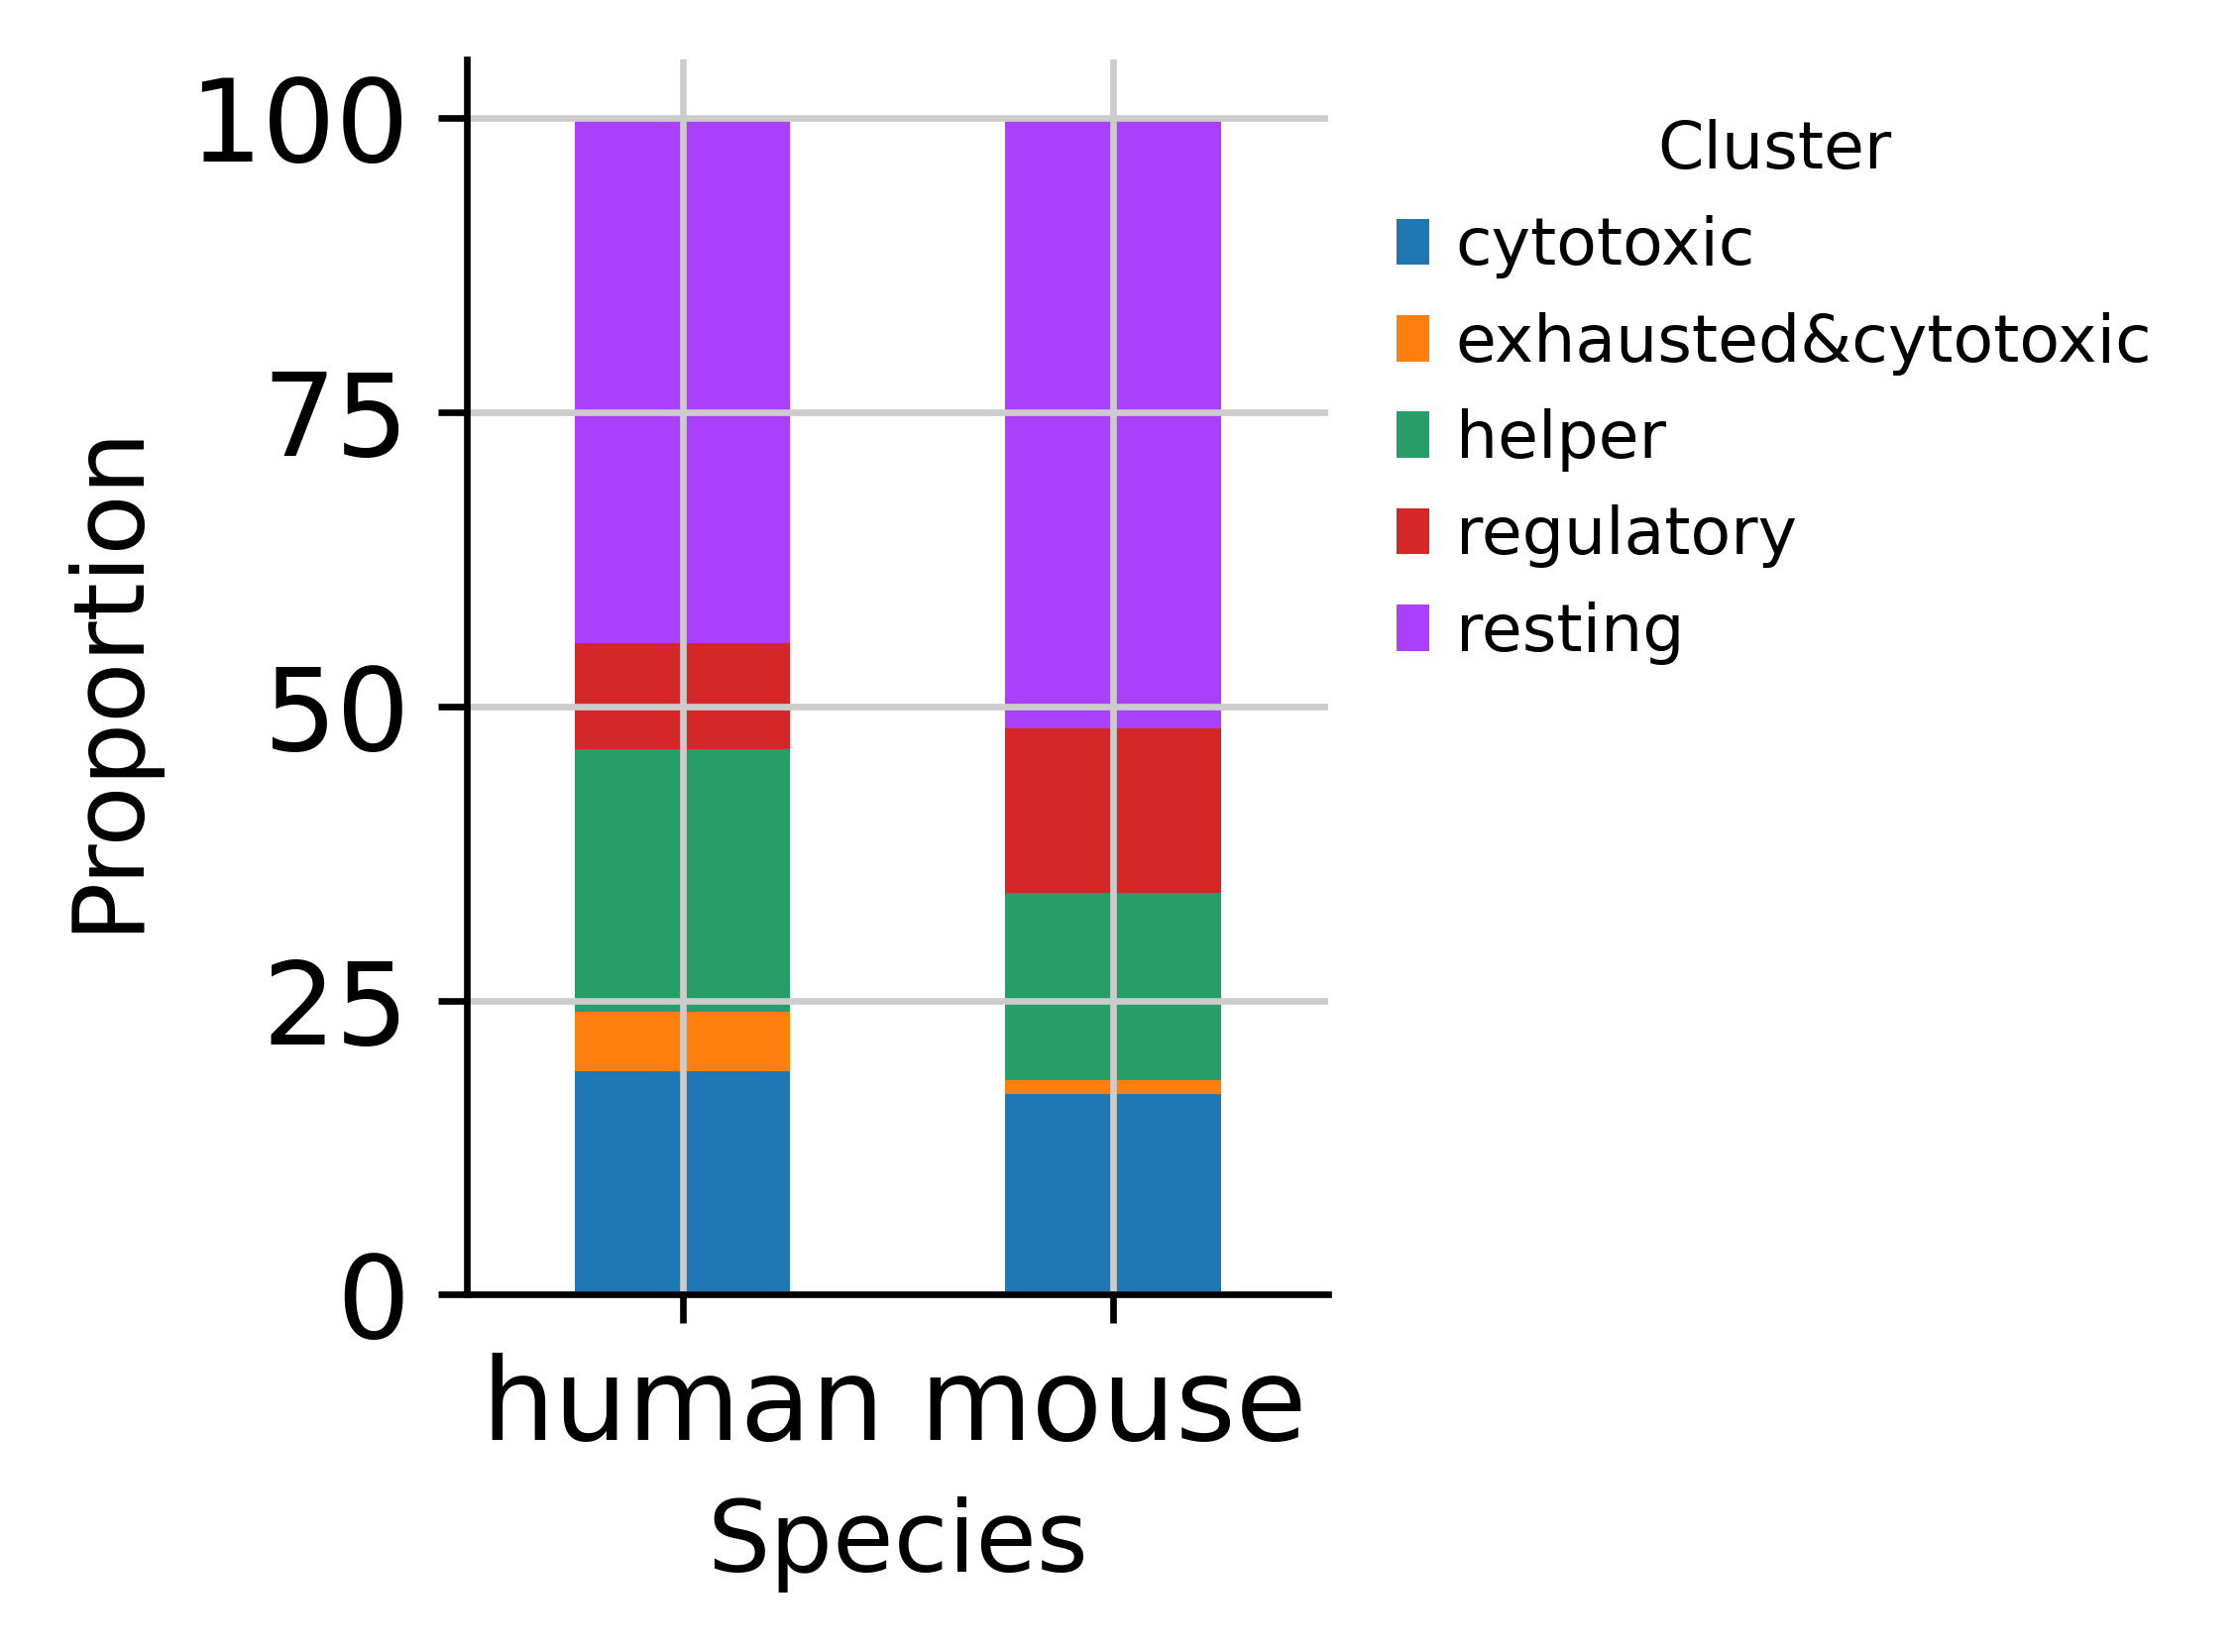

In [43]:
# function-species
cluster_props=get_cluster_proportions(adatas, cluster_key='function',sample_key='species')
plot_cluster_proportions(cluster_props)